In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#from matplotlib import gridspec
import re
#plt.rcParams['font.family'] = 'NanumGothic'

# 사이트 연결, 헤더 사용 : 제가 참고 링크 드리겠슴다...이거 사용자 마다 아마 바꿔야 될것 같아요, 
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15'}

# 엑소데이터

In [31]:
# 크롤링할 웹사이트 주소 설정
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80220847', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
song_id=[]
song_title=[]

# song id 찾기
for a in soup.find_all("tr",attrs= {"class" : "list"}):
    id=a.get('songid')
    song_id.append(id)
print(song_id)
    
# 곡제목(song title) 찾기
for a2 in soup.find_all("a",attrs= {"class" : "title ellipsis"}):
    ti=a2.get('title')
    song_title.append(ti)
    # 태그가<a>에 class도 같은게 있어서 그런지 none이 자꾸 들어가서 삭제해줬어요
    song_title = list (filter ( None , song_title))
print(song_title)

# song id와 곡제목으로 사전 만들기 (1~30위)
EXO_1 = dict(zip(song_id, song_title))
EXO_1

['82145527', '89655988', '90128240', '82145523', '82145524', '88468830', '88350489', '81992735', '84215866', '81922644', '83647188', '85584767', '85584768', '87625527', '86818658', '86350817', '87295602', '81922655', '83215662', '85622746', '87295601', '86535281', '86818656', '82145526', '87414751', '85622732', '81992738', '81922639', '86818657', '81922654']
['첫 눈', 'Obsession', 'Confession', '12월의 기적 (Miracles in December)', 'Christmas Day', 'Love Shot', 'Tempo', '으르렁 (Growl)', 'LOVE ME RIGHT', "나비소녀 (Don't Go)", 'CALL ME BABY', '불공평해 (Unfair)', 'Sing For You', 'Universe', 'What I Want For Christmas', 'Monster', 'Ko Ko Bop', '피터팬 (Peter Pan)', "December, 2014 (The Winter's Tale)", '발자국 (On the snow)', '전야 (前夜) (The Eve)', 'Lotto', 'For Life', 'My turn to cry', 'Power', 'Girl x Friend', 'Lucky', "Baby, Don't Cry (인어의 눈물)", 'Falling For You', '3.6.5']


{'82145527': '첫 눈',
 '89655988': 'Obsession',
 '90128240': 'Confession',
 '82145523': '12월의 기적 (Miracles in December)',
 '82145524': 'Christmas Day',
 '88468830': 'Love Shot',
 '88350489': 'Tempo',
 '81992735': '으르렁 (Growl)',
 '84215866': 'LOVE ME RIGHT',
 '81922644': "나비소녀 (Don't Go)",
 '83647188': 'CALL ME BABY',
 '85584767': '불공평해 (Unfair)',
 '85584768': 'Sing For You',
 '87625527': 'Universe',
 '86818658': 'What I Want For Christmas',
 '86350817': 'Monster',
 '87295602': 'Ko Ko Bop',
 '81922655': '피터팬 (Peter Pan)',
 '83215662': "December, 2014 (The Winter's Tale)",
 '85622746': '발자국 (On the snow)',
 '87295601': '전야 (前夜) (The Eve)',
 '86535281': 'Lotto',
 '86818656': 'For Life',
 '82145526': 'My turn to cry',
 '87414751': 'Power',
 '85622732': 'Girl x Friend',
 '81992738': 'Lucky',
 '81922639': "Baby, Don't Cry (인어의 눈물)",
 '86818657': 'Falling For You',
 '81922654': '3.6.5'}

In [32]:
# 곡제목, 가사를 담을빈 리스트 만들기
song_title=[]
song_lyrics=[]
total_listen = []
total_play = []

# 문장부호선언
pun = [',', '.', '?', '!', ':', ';', '(',')','’',r"'"]

# 불용어 텍스트 파일 불러오기
stopword_list=[]
with open('k_stopword.txt', 'r', encoding='utf-8') as file:
    stopword_list = file.readlines()
# print(stopword_list)

# 데이터셋을 만들기 위해 for문으로. 각 song_id를 가져옴
for i in song_id:
    html = requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+i, headers=headers).text # 크롤링할 웹사이트 주소 설정
    soup2 = BeautifulSoup(html, 'html.parser')
    
    # 곡제목(song title) 찾기
    title=soup2.find('h2', class_='name').text
    
    # 제목 앞뒤 공백제거
    title=title.strip()
    song_title.append(title)
    lyrics=soup2.find("pre",id="pLyrics").find('p').text
    
    # 가사 앞뒤...사이사이 공백제거, splitlines은 문자열 내 개행문자 빼고 리스트로 돌려줌 -> 다시 조인
    lyrics=lyrics.splitlines()
    lyrics="".join( lyrics)
    
    # 가사에 있는 문장부호 제거
    lyrics = re.sub('|'.join(map(re.escape, pun)), '', lyrics)
    song_lyrics.append(lyrics)
    
    # 가사에 있는 불용어 제거
    song_lyrics2 = []
    for token in song_lyrics: 
        if token not in stopword_list: 
            song_lyrics2.append(token)
            
    # 전체 청취자수, 재생수 찾기
    find_total_info = soup2.find('div', class_='total').text.split()
    total_listen.append(find_total_info[0])
    total_play.append(find_total_info[1])

# 곡제목과 가사로 사전 만들기 (Train용 : 1~30위)
EXO_2 = dict(zip(song_title, song_lyrics2))

# 전체 청취자수, 재생수 데이터 프레임 만들기
EXO_Popul = pd.DataFrame({'제목':song_title, '전체 청취자':total_listen, '전체 재생':total_play})
EXO_Popul.head()

,제목,전체 청취자,전체 재생
0,첫 눈,"825,049","9,595,478"
1,Obsession,"938,892","33,390,734"
2,Confession,"4,616","563,902"
3,12월의 기적 (Miracles in December),"905,648","10,888,599"
4,Christmas Day,"424,990","4,116,280"


In [73]:
#곡번호와 타이틀 데이터 프레임 만들기 (Train용 1~10위)
EXO_df_1 = pd.DataFrame(list(EXO_1.items()), columns=['곡 번호', '곡 제목'])
EXO_df_1.head()

,곡 번호,곡 제목
0,82145527,첫 눈
1,89655988,Obsession
2,90128240,Confession
3,82145523,12월의 기적 (Miracles in December)
4,82145524,Christmas Day


In [74]:
#곡제목과 가사 데이터 프레임 만들기 (All)
EXO_df_2 = pd.DataFrame(list(EXO_2.items()),columns=['곡 제목', '가사'])
EXO_df_2.head()

,곡 제목,가사
0,첫 눈,첫눈 오는 이런 오후에너에게 전화를걸 수만 있다면 기쁠텐데벌써 일년이 지났는데난 아...
1,Obsession,제발 이제 그만밤이 눈을 멀게 끔 하니넌 또 몰래 숨어들었지잠든 귓가 쓱 핥다 쳐다...
2,Confession,Yo I Just wanna know youTime for confessionTim...
3,12월의 기적 (Miracles in December),보이지 않는 널 찾으려고 애쓰다 들리지 않는 널 들으려 애쓰다 보이지 않던 게 보이...
4,Christmas Day,설렘에 부풀어 눈을 뜨는 아침선물의 리본끈을 풀어보는 느낌너를 알아가는 날이면 날마...


In [72]:
#곡 제목을 기준삼아 데이터 프레임 사전 조인
EXO_final = pd.merge(EXO_df_1, EXO_df_2, on='곡 제목')
EXO_final.head()

,곡 번호,곡 제목,가사
0,82145527,첫 눈,첫눈 오는 이런 오후에너에게 전화를걸 수만 있다면 기쁠텐데벌써 일년이 지났는데난 아...
1,89655988,Obsession,제발 이제 그만밤이 눈을 멀게 끔 하니넌 또 몰래 숨어들었지잠든 귓가 쓱 핥다 쳐다...
2,90128240,Confession,Yo I Just wanna know youTime for confessionTim...
3,82145523,12월의 기적 (Miracles in December),보이지 않는 널 찾으려고 애쓰다 들리지 않는 널 들으려 애쓰다 보이지 않던 게 보이...
4,82145524,Christmas Day,설렘에 부풀어 눈을 뜨는 아침선물의 리본끈을 풀어보는 느낌너를 알아가는 날이면 날마...


In [7]:
# 크롤링할 웹사이트 주소 설정
html = requests.get('https://www.genie.co.kr/detail/artistAlbum?xxnm=80220847', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
EXO_album_num=[]
    
# 곡 형태별 수 찾기
for num in soup.find_all("em"):
    EXO_album_num.append(int(num.text))
# 숫자가 0인 값 빼기
EXO_album_num=list(filter((0).__ne__, EXO_album_num))

EXO_album_df = pd.DataFrame(EXO_album_num, columns=['엑소'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
EXO_album_df

,엑소
전체앨범,54
정규앨범,12
싱글/EP,10
기타앨범,5
참여앨범,27


In [8]:
# 크롤링할 웹사이트 주소 설정
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80220847', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
EXO_songs_num = int(soup.find('em').text)

# 숫자가 0인 값 빼기
EXO_songs_num

418

## 트와이스 데이터

In [28]:
# 크롤링할 웹사이트 주소 설정
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80463902', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
song_id=[]
song_title=[]

# song id 찾기
for a in soup.find_all("tr",attrs= {"class" : "list"}):
    id=a.get('songid')
    song_id.append(id)
print(song_id)
    
# 곡제목(song title) 찾기
for a2 in soup.find_all("a",attrs= {"class" : "title ellipsis"}):
    ti=a2.get('title')
    song_title.append(ti)
    # 태그가<a>에 class도 같은게 있어서 그런지 none이 자꾸 들어가서 삭제해줬어요
    song_title = list (filter ( None , song_title))
print(song_title)

# song id와 곡제목으로 사전 만들기
TW_1 = dict(zip(song_id, song_title))
TW_1

['91165220', '91710048', '90313511', '87590605', '88824340', '89378658', '88353506', '88098432', '87590604', '87893782', '86161553', '86962806', '86677293', '87490163', '85260893', '87122182', '91165222', '91165221', '88458580', '91165223', '91165226', '91165225', '91165227', '91165231', '91165224', '91165229', '91165230', '91165232', '91165228', '88353512']
["I CAN'T STOP ME", 'CRY FOR ME', 'MORE & MORE', 'Merry & Happy', 'FANCY', 'Feel Special', 'YES or YES', 'Dance The Night Away', 'Heart Shaker', 'What is Love?', 'CHEER UP', 'KNOCK KNOCK', 'TT', 'LIKEY', 'OOH-AHH하게', 'SIGNAL', 'UP NO MORE', 'HELL IN HEAVEN', '올해 제일 잘한 일', 'DO WHAT WE LIKE', 'QUEEN', 'BELIEVER', 'GO HARD', 'SAY SOMETHING', 'BRING IT BACK', 'HANDLE IT', 'DEPEND ON YOU', 'BEHIND THE MASK', 'SHOT CLOCK', 'BDZ (Korean Ver.)']


{'91165220': "I CAN'T STOP ME",
 '91710048': 'CRY FOR ME',
 '90313511': 'MORE & MORE',
 '87590605': 'Merry & Happy',
 '88824340': 'FANCY',
 '89378658': 'Feel Special',
 '88353506': 'YES or YES',
 '88098432': 'Dance The Night Away',
 '87590604': 'Heart Shaker',
 '87893782': 'What is Love?',
 '86161553': 'CHEER UP',
 '86962806': 'KNOCK KNOCK',
 '86677293': 'TT',
 '87490163': 'LIKEY',
 '85260893': 'OOH-AHH하게',
 '87122182': 'SIGNAL',
 '91165222': 'UP NO MORE',
 '91165221': 'HELL IN HEAVEN',
 '88458580': '올해 제일 잘한 일',
 '91165223': 'DO WHAT WE LIKE',
 '91165226': 'QUEEN',
 '91165225': 'BELIEVER',
 '91165227': 'GO HARD',
 '91165231': 'SAY SOMETHING',
 '91165224': 'BRING IT BACK',
 '91165229': 'HANDLE IT',
 '91165230': 'DEPEND ON YOU',
 '91165232': 'BEHIND THE MASK',
 '91165228': 'SHOT CLOCK',
 '88353512': 'BDZ (Korean Ver.)'}

In [29]:
# 곡제목, 가사를 담을빈 리스트 만들기
song_title=[]
song_lyrics=[]
total_listen = []
total_play = []

# 데이터셋을 만들기 위해 for문으로. 각 song_id를 가져옴
for i in song_id:
    html = requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+i, headers=headers).text # 크롤링할 웹사이트 주소 설정
    soup2 = BeautifulSoup(html, 'html.parser')
    
# 곡제목(song title) 찾기
    title=soup2.find('h2', class_='name').text
    
    # 제목 앞뒤 공백제거
    title=title.strip()
    song_title.append(title)
    lyrics=soup2.find("pre",id="pLyrics").find('p').text
    
    # 가사 앞뒤...사이사이 공백제거, splitlines은 문자열 내 개행문자 빼고 리스트로 돌려줌 -> 다시 조인
    lyrics=lyrics.splitlines()
    lyrics="".join( lyrics)
    
    # 가사에 있는 문장부호 제거
    lyrics = re.sub('|'.join(map(re.escape, pun)), '', lyrics)
    song_lyrics.append(lyrics)
    
    # 가사에 있는 불용어 제거
    song_lyrics2 = []
    for token in song_lyrics: 
        if token not in stopword_list: 
            song_lyrics2.append(token)
            
    # 전체 청취자수, 재생수 찾기
    find_total_info = soup2.find('div', class_='total').text.split()
    total_listen.append(find_total_info[0])
    total_play.append(find_total_info[1])

# 곡제목과 가사로 사전 만들기 (All)
TW_2 = dict(zip(song_title, song_lyrics2))

# 전체 청취자수, 재생수 데이터 프레임 만들기
TW_Popul = pd.DataFrame({'제목':song_title, '전체 청취자':total_listen, '전체 재생':total_play})
TW_Popul.head()

,제목,전체 청취자,전체 재생
0,I CAN'T STOP ME,"887,614","10,351,339"
1,CRY FOR ME,"61,063","160,327"
2,MORE & MORE,"1,464,864","22,544,840"
3,Merry & Happy,"598,236","5,733,050"
4,FANCY,"2,161,391","51,309,223"


In [71]:
#곡번호와 타이틀 데이터 프레임 만들기
TW_df_1 = pd.DataFrame(list(TW_1.items()), columns=['곡 번호', '곡 제목'])
TW_df_1.head()

,곡 번호,곡 제목
0,91165220,I CAN'T STOP ME
1,90313511,MORE & MORE
2,91710048,CRY FOR ME
3,87590605,Merry & Happy
4,88824340,FANCY


In [70]:
#곡제목과 가사 데이터 프레임 만들기
TW_df_2 = pd.DataFrame(list(TW_2.items()),columns=['곡 제목', '가사'])
TW_df_2.head()

,곡 제목,가사
0,I CAN'T STOP ME,알람이 울려대 Ring ring a ling서로의 눈길이 닿을 때마다알면서 빙빙 도...
1,MORE & MORE,I know I want it입에 바른 소린 이제 그만할게Cause I deserv...
2,CRY FOR ME,I know 고쳐 쓸 가치도 없단 걸하지만 그녀와 달리 난 널쉽게 놔줄 맘이 없거든...
3,Merry & Happy,매년 12월 달력을 넘길 때마다시작되는 그 알 수 없는 허전함은모른 척을 해봐도 밀...
4,FANCY,지금 하늘 구름 색은 Tropical yeah저 태양 빨간빛 네 두 볼 같아Oh t...


In [75]:
#곡 번호를 기준삼아 데이터 프레임 사전 조인
TW_final = pd.merge(TW_df_1, TW_df_2, on='곡 제목')
TW_final.head()

,곡 번호,곡 제목,가사
0,91165220,I CAN'T STOP ME,알람이 울려대 Ring ring a ling서로의 눈길이 닿을 때마다알면서 빙빙 도...
1,90313511,MORE & MORE,I know I want it입에 바른 소린 이제 그만할게Cause I deserv...
2,91710048,CRY FOR ME,I know 고쳐 쓸 가치도 없단 걸하지만 그녀와 달리 난 널쉽게 놔줄 맘이 없거든...
3,87590605,Merry & Happy,매년 12월 달력을 넘길 때마다시작되는 그 알 수 없는 허전함은모른 척을 해봐도 밀...
4,88824340,FANCY,지금 하늘 구름 색은 Tropical yeah저 태양 빨간빛 네 두 볼 같아Oh t...


In [14]:
html = requests.get('https://www.genie.co.kr/detail/artistAlbum?xxnm=80463902', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
TW_album_num=[]
    
# 곡 형태별 수 찾기
for num in soup.find_all("em"):
    TW_album_num.append(int(num.text))
                        
# 숫자가 0인 값 빼기
TW_album_num=list(filter((0).__ne__, TW_album_num))
    

TW_album_df = pd.DataFrame(TW_album_num, columns=['트와이스'],index=['전체앨범', '정규앨범', '싱글/EP', '기타앨범', '참여앨범'])
TW_album_df

,트와이스
전체앨범,35
정규앨범,7
싱글/EP,24
기타앨범,2
참여앨범,2


In [15]:
html = requests.get('https://www.genie.co.kr/detail/artistSong?xxnm=80463902', headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 빈 리스트 만들기
TW_songs_num = int(soup.find('em').text)

# 숫자가 0인 값 빼기
TW_songs_num

218

In [16]:
songs_df = pd.DataFrame({'엑소':[EXO_songs_num],'트와이스':[TW_songs_num]},index=['전체곡'])
songs_df

,엑소,트와이스
전체곡,418,218


In [17]:
album_df = EXO_album_df.join(TW_album_df)
album_df

,엑소,트와이스
전체앨범,54,35
정규앨범,12,7
싱글/EP,10,24
기타앨범,5,2
참여앨범,27,2


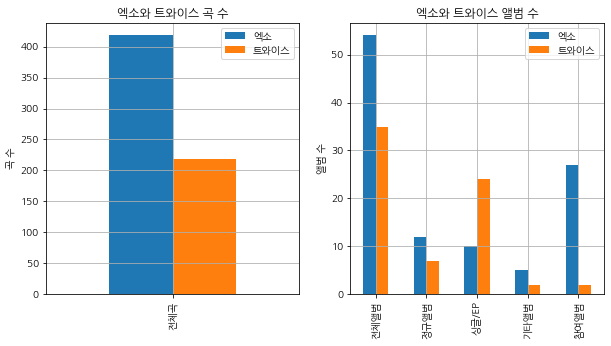

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

songs= songs_df.plot(kind='bar',title="엑소와 트와이스 곡 수", ylabel='곡 수', grid=True, ax=ax[0])
album = album_df.plot(kind='bar',title="엑소와 트와이스 앨범 수", ylabel='앨범 수', grid=True, ax=ax[1])
plt.show()

## 품사태깅(엑소)

In [19]:
#품사 태깅을 위한 konlpy Import, okt는 한국어 분석기
from konlpy.tag import Okt
twi_tagger = Okt()
from konlpy.utils import pprint

In [20]:
 # 토큰화를 위한 모듈 호출
import nltk
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer

# 불용어 제거를 위한 모듈 호출
from nltk.corpus import stopwords


# (돈, Noun) -> "돈/Noun" 형태로 바꿈
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [21]:
# 리뷰 단어 리스트 형태로 만드는 함수
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError:
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [76]:
#단어를 품사 단위로 
words=[]
for review in EXO_final["가사"]:
    words += review_to_wordlist(review)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [23]:
#단어 단위로 분해 확인
pprint(words[:10])

['첫/Modifier',
 '눈/Noun',
 '오다/Verb',
 '이렇다/Adjective',
 '오후/Noun',
 '에/Josa',
 '너/Noun',
 '에게/Josa',
 '전화/Noun',
 '를/Josa']


In [24]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [25]:
#전체 단어 수 세기
len(words_nltk.vocab())

1927

In [26]:
# 결과 저장
EXO_result2 = words_nltk.vocab().most_common(980)
# 데이터 프레임으로 생성
EXO_result2 = pd.DataFrame(EXO_result2);EXO_result2[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

,0,1
0,너/Noun,152
1,하다/Verb,151
2,을/Josa,130
3,에/Josa,122
4,이/Josa,116
5,의/Josa,101
6,oh/Alpha,87
7,내/Noun,81
8,널/Noun,74
9,-/Punctuation,73


In [27]:
EXO_result2.columns = ['word', 'counts']
EXO_result2[:10]
#단어와 품사가 합쳐진 것을 나눠줌
EXO_result2['단어'], EXO_result2['품사'] = zip(*EXO_result2.word.map(lambda x: x.split('/')))
EXO_result2 = EXO_result2.drop(['word'], 1)
#보기 좋은 순서로 재배치
EXO_result2 = EXO_result2[['단어', '품사', 'counts']]

In [28]:
#명사만 10위까지 뽑기
Noun = EXO_result2['품사'] == "Noun"
EXO_result2[Noun][:10]

,단어,품사,counts
0,너,Noun,152
7,내,Noun,81
8,널,Noun,74
10,나,Noun,69
15,눈,Noun,55
20,네,Noun,48
22,그,Noun,47
25,날,Noun,44
28,말,Noun,40
34,난,Noun,37


In [29]:
#동사만 10위까지 뽑기
Verb = EXO_result2['품사'] == "Verb"
EXO_result2[Verb][:10]

,단어,품사,counts
1,하다,Verb,151
21,보다,Verb,48
31,내다,Verb,39
32,않다,Verb,39
49,되다,Verb,28
61,들다,Verb,23
72,돼다,Verb,21
73,가다,Verb,20
79,모르다,Verb,19
83,버리다,Verb,18


In [30]:
#형용사만 10위까지
Adjective = EXO_result2['품사'] == "Adjective"
EXO_result2[Adjective][:10]

,단어,품사,counts
18,있다,Adjective,51
23,없다,Adjective,47
33,같다,Adjective,37
87,하얗다,Adjective,17
95,그렇다,Adjective,16
98,좋다,Adjective,16
102,아니다,Adjective,16
222,이렇다,Adjective,8
245,아름답다,Adjective,8
247,영원하다,Adjective,8


## 품사태깅(트와이스)

In [31]:
#단어를 품사 단위로 
words=[]
for review in TW_final["가사"]:
    words += review_to_wordlist(review)

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


In [32]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [33]:
#단어 단위로 분해 확인
pprint(words[:10])

['알람/Noun',
 '이/Josa',
 '울리다/Verb',
 'Ring/Alpha',
 'ring/Alpha',
 'a/Alpha',
 'ling/Alpha',
 '서로/Noun',
 '의/Josa',
 '눈길/Noun']


In [34]:
#전체 단어 수 세기
len(words_nltk.vocab())

1821

In [35]:
# 결과 저장
TW_result2 = words_nltk.vocab().most_common(980)
# 데이터 프레임으로 생성
TW_result2 = pd.DataFrame(TW_result2);TW_result2[:20]
# 결과로 가장 많이 나온게 ''<-이거인데 버릴지 말지 고민 Let's이런식으로 쓰여서

,0,1
0,하다/Verb,171
1,I/Alpha,126
2,이/Josa,118
3,을/Josa,109
4,you/Alpha,100
5,knock/Alpha,98
6,내/Noun,97
7,가/Josa,94
8,너/Noun,91
9,에/Josa,84


In [36]:
TW_result2.columns = ['word', 'counts']
TW_result2[:10]
#단어와 품사가 합쳐진 것을 나눠줌
TW_result2['단어'], TW_result2['품사'] = zip(*TW_result2.word.map(lambda x: x.split('/')))
TW_result2 = TW_result2.drop(['word'], 1)
#보기 좋은 순서로 재배치
TW_result2 = TW_result2[['단어', '품사', 'counts']]

In [37]:
#명사만 10위까지 뽑기
Noun = TW_result2['품사'] == "Noun"
TW_result2[Noun][:10]

,단어,품사,counts
6,내,Noun,97
8,너,Noun,91
14,더,Noun,67
21,날,Noun,53
22,것,Noun,52
23,맘,Noun,51
28,네,Noun,45
40,나,Noun,34
42,이,Noun,33
43,난,Noun,33


In [38]:
#동사만 10위까지 뽑기
Verb = TW_result2['품사'] == "Verb"
TW_result2[Verb][:10]

,단어,품사,counts
0,하다,Verb,171
19,않다,Verb,60
30,보다,Verb,42
36,모르다,Verb,38
44,가다,Verb,33
51,싶다,Verb,29
53,보내다,Verb,28
56,버리다,Verb,27
60,되다,Verb,25
61,돼다,Verb,25


In [39]:
#형용사만 10위까지
Adjective = TW_result2['품사'] == "Adjective"
TW_result2[Adjective][:10]

,단어,품사,counts
13,있다,Adjective,67
16,없다,Adjective,66
32,같다,Adjective,41
39,어떻다,Adjective,35
65,그렇다,Adjective,25
92,원하다,Adjective,20
105,싫다,Adjective,17
108,아니다,Adjective,17
122,이렇다,Adjective,16
147,좋다,Adjective,13


In [40]:
#워드 클라우드
import numpy as np
from wordcloud import WordCloud

#워드클라우드 설정
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf',
              background_color="white",
              width=1000,
              height=1000,
              max_words=100,
              max_font_size=300)

In [41]:
# 처음에 조사 제외를 안해줬더니 워드클라우드 결과가 만족스럽지않아서 조사 제외
EXO_Josa = EXO_result2['품사'] == "Josa"
EXO_j = EXO_result2[EXO_Josa].index
EXO_word_df = EXO_result2.drop(EXO_j)
EXO_word_df.drop('품사', axis = 1, inplace = True)
EXO_list = EXO_word_df.values.tolist()
EXO_dict = dict(EXO_list)

wordcloud_exo = wc.generate_from_frequencies(EXO_dict)
array_wc_exo = wordcloud_exo.to_array()

In [42]:
# TW 데이터에서도 동일하게 조사 제외
TW_Josa = TW_result2['품사'] == "Josa"
TW_j = TW_result2[TW_Josa].index
TW_word_df = TW_result2.drop(TW_j)
TW_word_df.drop('품사', axis = 1, inplace = True)
TW_list = TW_word_df.values.tolist()
TW_dict = dict(TW_list)

TW_wordcloud = wc.generate_from_frequencies(TW_dict)
TW_wc_array = TW_wordcloud.to_array()

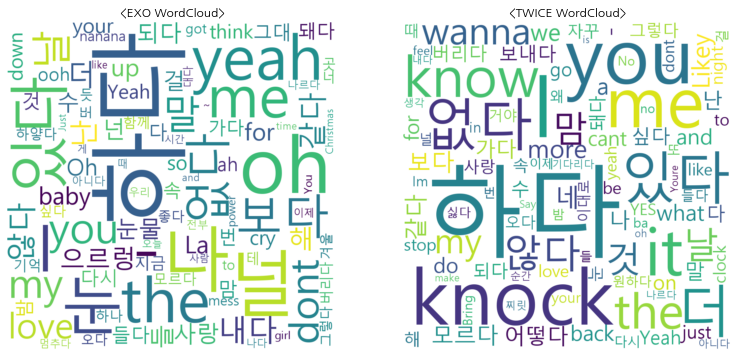

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(13, 13))

ax[0].imshow(array_wc_exo, interpolation="bilinear")
ax[0].axis('off') # x. y축 숫자 제거
ax[0].set_title("<EXO WordCloud>")

ax[1].imshow(TW_wc_array, interpolation="bilinear")
ax[1].axis('off') # x. y축 숫자 제거
ax[1].set_title("<TWICE WordCloud>")

plt.show()

# 알고리즘 구현

In [44]:
# 엑소 노래별 가사의 단어 종류별 개수 (조사는 무의미하므로 포함 안함)
cnt_Total = []
ratio_Noun = []
ratio_Verb = []
ratio_Adject = []
ratio_Alpha = []
ratio_else = []
titles = []

#단어를 품사 단위로 (각 가사별로 조사할 예정)
for review, title in zip(EXO_final["가사"], EXO_final["곡 제목"]):
    titles.append(title)
    cnt_n = 0
    cnt_v = 0
    cnt_ad = 0
    cnt_al = 0
    cnt_else = 0
    words = []
    #words[] = review_to_wordlist(review)
    words = review_to_wordlist(review)

    #전체 단어 수 세기
    cnt_Total.append(len(words))
    
    #각 단어 수 세기
    for word in words:
        tmp = word.split('/')[1]
        if tmp == "Noun": cnt_n += 1
        elif tmp  == "Verb": cnt_v += 1
        elif tmp  == "Adjective": cnt_ad += 1
        elif tmp  == "Alpha": cnt_al += 1
        else : cnt_else += 1
    ratio_Noun.append(round(cnt_n/len(words),3))
    ratio_Verb.append(round(cnt_v/len(words),3))
    ratio_Adject.append(round(cnt_ad/len(words),3))
    ratio_Alpha.append(round(cnt_al/len(words),3))
    ratio_else.append(round(cnt_else/len(words),3))
# EXO_words = dict(zip(titles, cnt_Total, ratio_Noun, ratio_Verb, ratio_Adject, ratio_Alpha))

# print(title, "\n", cnt_Total, "\n", ratio_Noun, "\n", ratio_Verb, "\n", ratio_Adject, "\n", ratio_Alpha)
EXO_df_fin = pd.DataFrame({'곡 제목':titles, '총 단어수':cnt_Total, '명사':ratio_Noun, '동사':ratio_Verb, '형용사':ratio_Adject, '영어':ratio_Alpha, '기타':ratio_else})
EXO_df_fin.head()

# 곡 제목 따로 저장
EXO_Titles = pd.DataFrame({'곡 제목':titles})

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


,곡 제목,총 단어수,명사,동사,형용사,영어,기타
0,첫 눈,314,0.443,0.204,0.086,0.032,0.236
1,Obsession,411,0.265,0.202,0.044,0.358,0.131
2,Confession,265,0.174,0.087,0.034,0.615,0.091
3,12월의 기적 (Miracles in December),262,0.435,0.229,0.065,0.004,0.267
4,Christmas Day,218,0.353,0.151,0.064,0.271,0.161


In [45]:
# 트와이스 노래별 가사의 단어 종류별 개수 (조사는 무의미하므로 포함 안함)
cnt_Total = []
ratio_Noun = []
ratio_Verb = []
ratio_Adject = []
ratio_Alpha = []
ratio_else = []
titles = []

#단어를 품사 단위로 (각 가사별로 조사할 예정)
for review, title in zip(TW_final["가사"], TW_final["곡 제목"]):
    titles.append(title)
    cnt_n = 0
    cnt_v = 0
    cnt_ad = 0
    cnt_al = 0
    cnt_else = 0
    words = []
    #words[] = review_to_wordlist(review)
    words = review_to_wordlist(review)

    #전체 단어 수 세기
    cnt_Total.append(len(words))
    
    #각 단어 수 세기
    for word in words:
        tmp = word.split('/')[1]
        if tmp == "Noun": cnt_n += 1
        elif tmp  == "Verb": cnt_v += 1
        elif tmp  == "Adjective": cnt_ad += 1
        elif tmp  == "Alpha": cnt_al += 1
        else : cnt_else += 1
    ratio_Noun.append(round(cnt_n/len(words),3))
    ratio_Verb.append(round(cnt_v/len(words),3))
    ratio_Adject.append(round(cnt_ad/len(words),3))
    ratio_Alpha.append(round(cnt_al/len(words),3))
    ratio_else.append(round(cnt_else/len(words),3))
    
TW_df_fin = pd.DataFrame({'곡 제목':titles, '총 단어수':cnt_Total, '명사':ratio_Noun, '동사':ratio_Verb, '형용사':ratio_Adject, '영어':ratio_Alpha, '기타':ratio_else})
TW_df_fin.head()

# 곡 제목 따로 저장
TW_Titles = pd.DataFrame({'곡 제목':titles})

c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file c:\users\duddm\appdata\local\programs\python\python38\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


,곡 제목,총 단어수,명사,동사,형용사,영어,기타
0,I CAN'T STOP ME,350,0.231,0.151,0.051,0.420,0.146
1,MORE & MORE,324,0.250,0.170,0.056,0.435,0.090
2,CRY FOR ME,284,0.246,0.113,0.018,0.479,0.144
3,Merry & Happy,232,0.341,0.190,0.129,0.082,0.259
4,FANCY,311,0.363,0.109,0.096,0.312,0.119


In [46]:
# 구분 추가 (엑소인지 트와이스인지 구별)
for i in range(len(EXO_df_fin)):
    EXO_df_fin['구분'] = 0
for i in range(len(TW_df_fin)):
    TW_df_fin['구분'] = 1
EXO_df_fin.head()

,곡 제목,총 단어수,명사,동사,형용사,영어,기타,구분
0,첫 눈,314,0.443,0.204,0.086,0.032,0.236,0
1,Obsession,411,0.265,0.202,0.044,0.358,0.131,0
2,Confession,265,0.174,0.087,0.034,0.615,0.091,0
3,12월의 기적 (Miracles in December),262,0.435,0.229,0.065,0.004,0.267,0
4,Christmas Day,218,0.353,0.151,0.064,0.271,0.161,0


In [47]:
# 엑소, 트와이스 데이터 합치기
All_df = pd.concat([EXO_df_fin, TW_df_fin])

In [48]:
# 문자열, 무의미한 데이터 총 단어수 삭제
All_df.drop('곡 제목', axis = 1, inplace = True) # 문자열이라 삭제
All_df.drop('총 단어수', axis = 1, inplace = True) # 무의미한 데이터라 삭제
All_df.drop('기타', axis = 1, inplace = True) # 무의미한 데이터라 삭제

In [80]:
All_df.head(10)

,명사,동사,형용사,영어,구분
0,0.443,0.204,0.086,0.032,0
1,0.265,0.202,0.044,0.358,0
2,0.174,0.087,0.034,0.615,0
3,0.435,0.229,0.065,0.004,0
4,0.353,0.151,0.064,0.271,0
5,0.243,0.118,0.038,0.437,0
6,0.272,0.157,0.069,0.347,0
7,0.461,0.269,0.039,0.030,0
8,0.308,0.077,0.034,0.398,0
9,0.365,0.173,0.070,0.109,0


c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\duddm\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22812 missing from current font.
  font.set_text(s, 0, flags=flags)


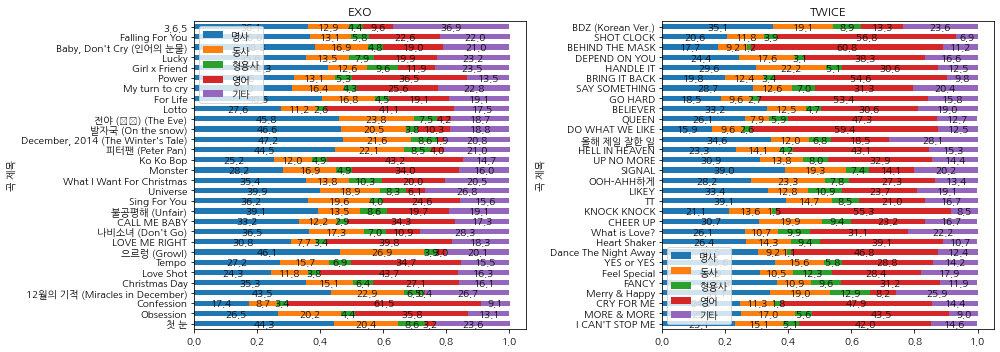

In [81]:
# 엑소, 트와이스 노래 별 품사 비율 비교 그래프 작성
fig, ax = plt.subplots(1,2,figsize=(14,5),tight_layout=True)

EXO_plt = EXO_df_fin.plot(kind='barh', stacked=True, x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'], ax=ax[0])
ax[0].set_title("EXO")
# 수평 막대그래프에 값 표시
for p in EXO_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    EXO_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
TW_plt = TW_df_fin.plot(kind='barh', stacked=True, x='곡 제목', y=['명사', '동사', '형용사', '영어','기타'],ax=ax[1])
ax[1].set_title("TWICE")
# 수평 막대그래프에 값 표시
for p in TW_plt.patches:
    left, bottom, width, height = p.get_bbox().bounds
    TW_plt.annotate("%.1f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')

In [96]:
# 데이터들 순서 무작위로 섞어주기
import sklearn
All_df_shuffled = sklearn.utils.shuffle(All_df)
# Train - Test 데이터 나누기 (7:3 비율로)

data_cnt = len(All_df_shuffled)

train_cnt = int(data_cnt*0.7) + 1

Train_df_set = All_df_shuffled[:train_cnt]
Test_df_set = All_df_shuffled[train_cnt:]
print("Train data count : ", len(Train_df_set)) 
print("Test data count : ", len(Test_df_set))  

Train data count :  43
Test data count :  17


In [97]:
# 데이터 셋 준비
X_Train = Train_df_set.drop("구분", axis=1) # 구분 열 버리고 저장
Y_Train = Train_df_set["구분"] # 구분 열 정보만 저장
X_Test = Test_df_set.drop("구분", axis=1).copy() # 구분 열 버리고 저장
Y_Test = Test_df_set["구분"]

In [53]:
# 기계 학습용 패키지 선언
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

#from sklearn.neural_network import MLPClassifier
#from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# 1 - Logistic Regression
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_Train, Y_Train)

Y_Pred = log_reg.predict(X_Test)
score_log_reg = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_log_reg = round(log_reg.score(X_Train, Y_Train) * 100, 2)
print("Logistic Regression Score : ",score_log_reg)

Logistic Regression Score :  70.59


In [55]:
# 2 - Linear SVC
lin_svc = LinearSVC()
lin_svc.fit(X_Train, Y_Train)

Y_Pred = lin_svc.predict(X_Test)
score_lin_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_lin_svc = round(lin_svc.score(X_Train, Y_Train) * 100, 2)
print("Linear SVC Score : ",score_lin_svc)

Linear SVC Score :  76.47


In [56]:
# 3 - Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_Train, Y_Train)

Y_Pred = dec_tree.predict(X_Test)
score_dec_tree = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_dec_tree = round(dec_tree.score(X_Train, Y_Train) * 100, 2)
print("Decision Tree Score : ",score_dec_tree)

Decision Tree Score :  76.47


In [57]:
# 4 - Gaussian Naive Bayes
gaus = GaussianNB()
gaus.fit(X_Train, Y_Train)

Y_Pred = gaus.predict(X_Test)
score_gaus = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_gaus = round(gaus.score(X_Train, Y_Train) * 100, 2)
print("Gaussian Naive Bayes Score : ",score_gaus)

Gaussian Naive Bayes Score :  76.47


In [58]:
# 5 - Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_Train, Y_Train)

Y_Pred = sgd.predict(X_Test)
score_sgd = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_sgd = round(sgd.score(X_Train, Y_Train) * 100, 2)
print("Stochastic Gradient Descent Score : ",score_sgd)

Stochastic Gradient Descent Score :  47.06


In [98]:
# 6 - Support Vector Machines
from sklearn.metrics import accuracy_score, confusion_matrix
svc = SVC()
solver = 'liblinear'
svc.fit(X_Train,Y_Train)

Y_Pred = svc.predict(X_Test)
score_svc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_svc = round(svc.score(X_Train, Y_Train) * 100, 2)
print("Support Vector Machines Score : ",score_svc)

Support Vector Machines Score :  76.47


In [63]:
# 7 - KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_Train, Y_Train)

Y_Pred = knn.predict(X_Test)
score_knn = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_knn = round(knn.score(X_Train, Y_Train) * 100, 2)
print("KNN Score : ",score_knn)

KNN Score :  76.47


In [64]:
# 8 - Random Forest
ran_fore = RandomForestClassifier(n_estimators = 100)
ran_fore.fit(X_Train, Y_Train)

Y_Pred = ran_fore.predict(X_Test)
score_ran_fore = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_ran_fore = round(ran_fore.score(X_Train, Y_Train) * 100, 2)
print("Random Forest Score : ",score_ran_fore)

Random Forest Score :  82.35


In [65]:
# 9 - Perceptron
perc = Perceptron()
perc.fit(X_Train, Y_Train)

Y_Pred = perc.predict(X_Test)
score_perc = round(np.mean(Y_Pred == Y_Test) * 100, 2)
#score_perc = round(perc.score(X_Train, Y_Train) * 100, 2)
print("Perceptron Score : ",score_perc)

Perceptron Score :  52.94


In [66]:
# 최종 결과 스코어 확인
model_res = pd.DataFrame({
    'Model name': ['Logistic Regression', 'Linear SVC', 'Decision Tree', 
                   'Gaussian Naive Bayes', 'Stochastic Gradient Descent', 
                   'Support Vector Machines', 'KNN', 'Random Forest', 
                   'Perceptron'],
    'Score': [score_log_reg, score_lin_svc, score_dec_tree, score_gaus, 
             score_sgd, score_svc, score_knn, score_ran_fore, score_perc]})
model_res.sort_values(by = 'Score', ascending = False)

,Model name,Score
7,Random Forest,82.35
1,Linear SVC,76.47
2,Decision Tree,76.47
3,Gaussian Naive Bayes,76.47
5,Support Vector Machines,76.47
6,KNN,76.47
0,Logistic Regression,70.59
8,Perceptron,52.94
4,Stochastic Gradient Descent,47.06


,구분,예측,예측 결과
0,0,0,성공
8,1,1,성공
2,1,1,성공
25,1,1,성공
19,1,1,성공
29,1,0,실패
4,1,1,성공
22,0,0,성공
20,0,0,성공
9,1,1,성공


In [89]:
# csv 파일 생성
final_res = pd.DataFrame({
    '명사' : Test_df_set['명사'],
    '동사' : Test_df_set['동사'],
    '형용사' : Test_df_set['형용사'],
    '영어' : Test_df_set['영어'],
    '구분(엑소:0 / 트와이스:1)' : Y_Pred})
final_res.to_csv('Final_Results_TextMining_Assignment.csv', mode = 'w', encoding = 'utf-8-sig', index = False)

In [90]:
final_check = pd.read_csv('Final_Results_TextMining_Assignment.csv')
final_check.describe()

,명사,동사,형용사,영어,구분(엑소:0 / 트와이스:1)
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.324706,0.146824,0.057471,0.296647,0.529412
std,0.086059,0.030678,0.025167,0.154537,0.514496
min,0.211000,0.107000,0.015000,0.019000,0.000000
25%,0.246000,0.126000,0.042000,0.191000,0.000000
50%,0.316000,0.138000,0.053000,0.311000,1.000000
75%,0.391000,0.168000,0.080000,0.431000,1.000000
max,0.472000,0.216000,0.099000,0.553000,1.000000
